# 분해 (Decomposition)
* 큰 하나의 행렬을 여러개의 작은 행렬로 분해
* 분해 과정에서 중요한 정보만 남게됨

## 데이터 불러오기 및 시각화

In [2]:
import numpy as np
import matplotlib.pylab as plt

from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA
from sklearn.decomposition import TruncatedSVD, DictionaryLearning, FactorAnalysis
from sklearn.decomposition import FastICA, NMF, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
iris, labels = load_iris(return_X_y=True)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True) # 섞어서 받아오도록

In [4]:
def plot_iris(iris, labels) :
    plt.figure()
    colors = ['navy', 'purple', 'red']
    for xy, label in zip(iris, labels) : 
        plt.scatter(xy[0], xy[1], color=colors[label])

In [110]:
def show_faces(faces):
  plt.figure()
  num_rows, num_cols = 2, 3
  for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(np.reshape(faces[i], (64, 64)), cmap=plt.cm.gray)

In [6]:
iris.shape

(150, 4)

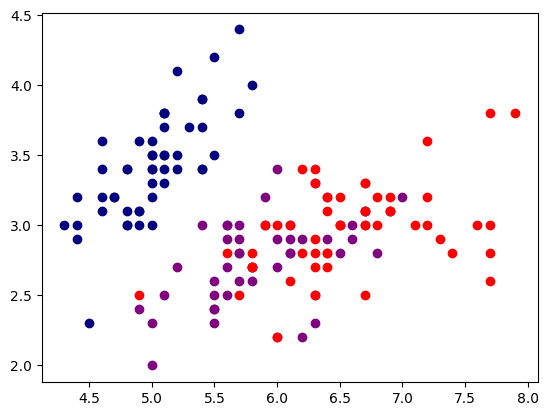

In [7]:
plot_iris(iris[:, :2], labels)

In [8]:
faces.shape

(400, 4096)

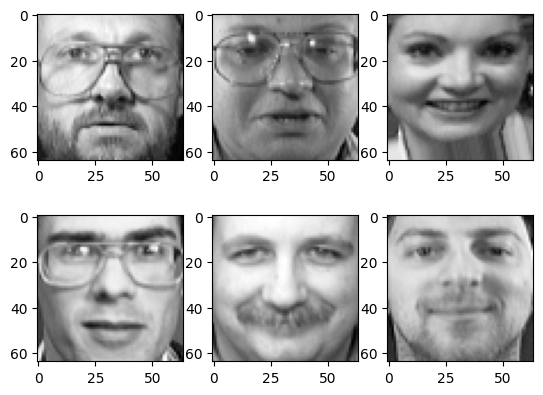

In [9]:
show_faces(faces)

## Principal Component Analysis (PCA)

* PCA를 사용해 iris 데이터 변환
* $150 \times 4$ 크기의 데이터를 $150 \times 2$ 크기의 행렬로 압축

In [10]:
model = PCA(n_components=2, random_state=0) # 4개 -> 2개로 차원 축소
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

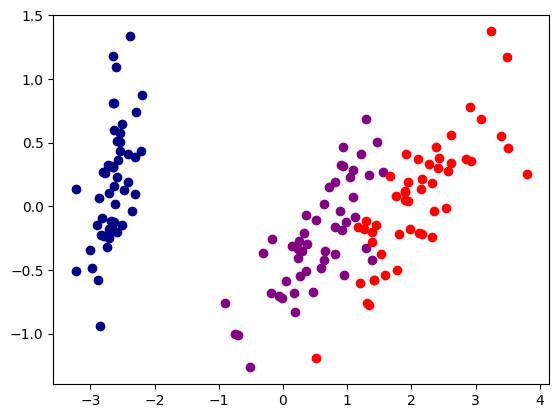

In [11]:
plot_iris(transformed_iris, labels)

* PCA를 통해 학습된 각 컴포넌트 (6개)
* 각 컴포넌트는 얼굴의 주요 특징을 나타냄

In [13]:
model = PCA(n_components=2*3, random_state=0) # 얼굴 2개씩 총 3개
model.fit(faces)
faces_components = model.components_
faces_components.shape # (400, 4096) -> (6, 4096) 

# 사람 얼굴이 주요 특징만 남긴 채로 차원축소

(6, 4096)

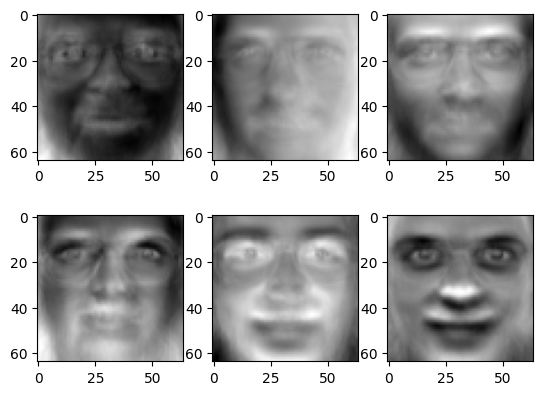

In [14]:
show_faces(faces_components)

## Incremental PCA

* PCA는 `SVD 알고리즘 실행을 위해 전체 학습용 데이터 셋을 메모리에 올려야 함`
* Incremental PCA는 학습 데이터를 `미니 배치 단위로 나누어 사용`
* 학습 데이터가 크거나 온라인으로 PCA 적용이 필요할 때 유용

In [15]:
model = IncrementalPCA(n_components=2)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

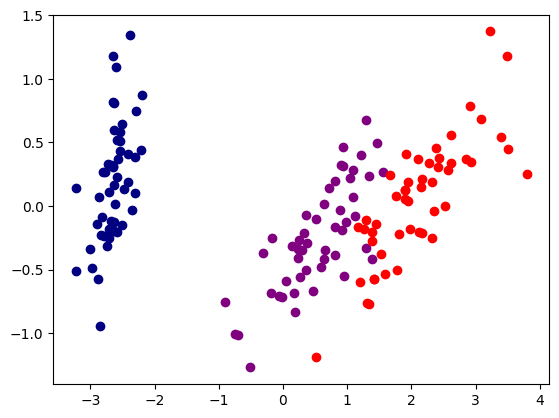

In [16]:
plot_iris(transformed_iris, labels)

In [18]:
model = IncrementalPCA(n_components=2*3)
model.fit(faces)
faces_components = model.components_
faces_components.shape

(6, 4096)

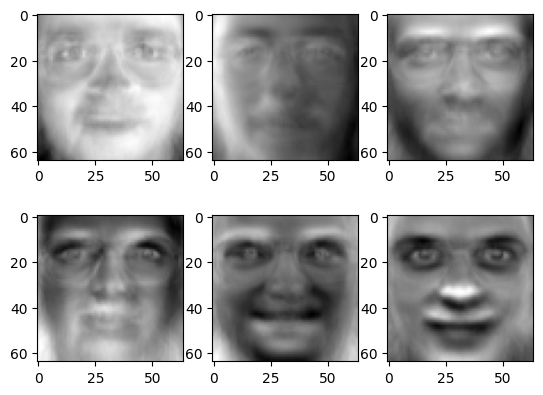

In [19]:
show_faces(faces_components)

# PCA 결과와 유사하게 얼굴의 특징만 남겨둔 채로 축소된 것을 알 수 있다

## Kernel PCA

* 차원 축소를 위한 복잡한 비선형 투형

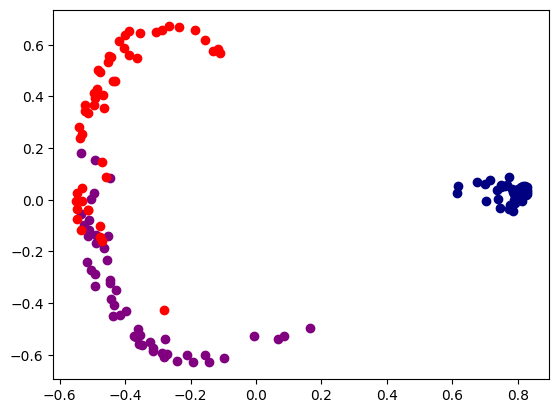

In [21]:
# kernel='rbf'로 해서 비선형 특성을 가질 수 있도록
model = KernelPCA(n_components=2, kernel='rbf', random_state=0) 
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

# 비선형 

In [22]:
# kernelPCA는 components_를 return시켜주지 않기 때문에 아래의 코드를 돌릴 수 없다
model = KernelPCA(n_components=2*3, kernel='rbf', random_state=0)
model.fit(faces)
faces_components = model.components_
faces_components.shape


AttributeError: 'KernelPCA' object has no attribute 'components_'

## Sparse PCA

* PCA의 주요 단점 중 하나는 `주성분들이 보통 모든 입력 변수들의 선형결합으로 나타난다는 점`
* 희소 주성분분석(Sparse PCA)는 `몇 개 변수들만의 선형결합으로 주성분을 나타냄으로써 이러한 단점을 극복`

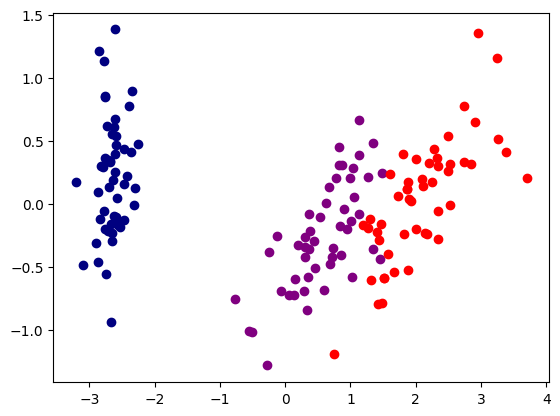

In [23]:
model = SparsePCA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

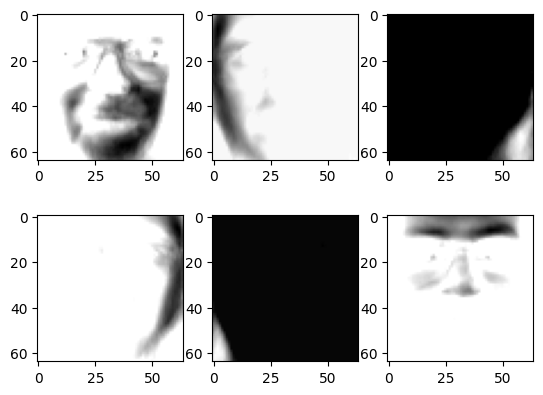

In [24]:
model = SparsePCA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Truncated Singular Value Decomposition (Truncated SVD)

* `PCA는 정방행렬에 대해서만 행렬 분해 가능`
* `SVD는 정방행렬 뿐만 아니라 행과 열이 다른 행렬도 분해 가능`
* PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하지만, SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능
* 전체 행렬 크기에 대해 Full SVD를 사용하는 경우는 적음
* 특이값이 0인 부분을 모두 제거하고 차원을 줄인 Truncated SVD를 주로 사용

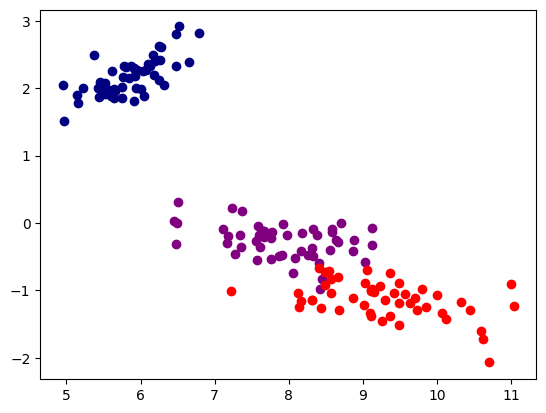

In [26]:
model = TruncatedSVD(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

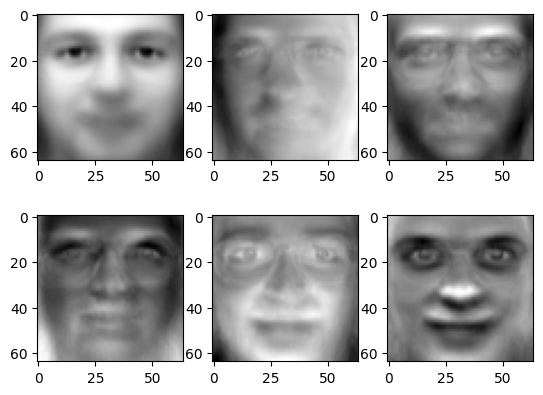

In [29]:
model = TruncatedSVD(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

# SVD도 얼굴의 특징들만 남겨둔 채로 차원축소

## Dictionary Learning

* Sparse code를 사용하여 데이터를 가장 잘 나타내는 사전 찾기
* Sparse coding은 overcomplete `기저벡터(basis vector)를 기반으로 데이터를 효율적으로 표현하기 위해 개발`
* 기저 벡터는 벡터 공간에 속하는 벡터의 집합이 선형 독립이고, 다른 모든 벡터 공간의 벡터들이 그 벡터 집합의 선형 조합으로 나타남

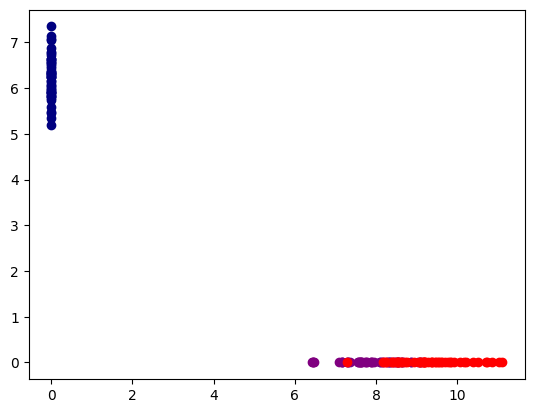

In [30]:
model = DictionaryLearning(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

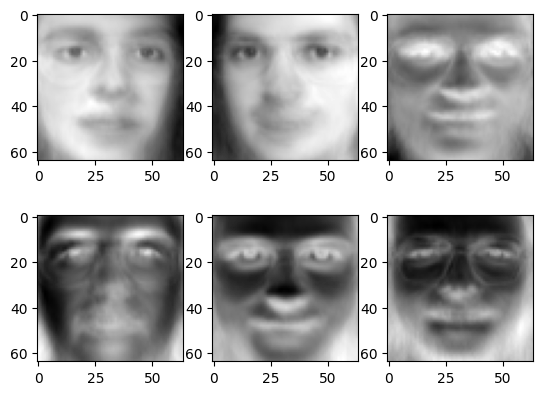

In [31]:
model = DictionaryLearning(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)


## Factor Analysis

* 요인 분석(Factor Analysis)은 `변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석방법`
* 요인 분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법
* `PCA에서는 오차(error)를 고려하지 않고, 요인 분석에서는 오차(error)를 고려`

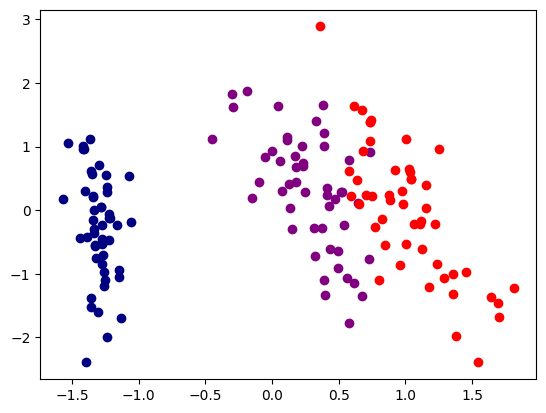

In [32]:
model = FactorAnalysis(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

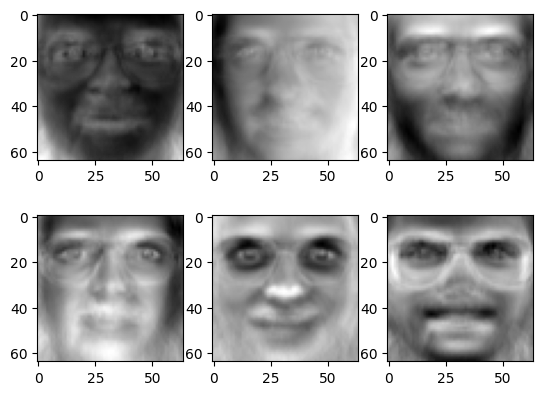

In [33]:
model = FactorAnalysis(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Independent Component Analysis(ICA)

* 독립 성분 분석(Independent Component Analysis, ICA)은 `다변량의 신호를` 통계적으로 `독립적인 하부 성분으로 분리`하는 계산 방법
* `ICA는 주성분을 이용하는 점은 PCA와 유사하지만, 데이터를 가장 잘 설명하는 축을 찾는 PCA와 달리 가장 독립적인 축, 독립성이 최대가 되는 벡터를 찾음`

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


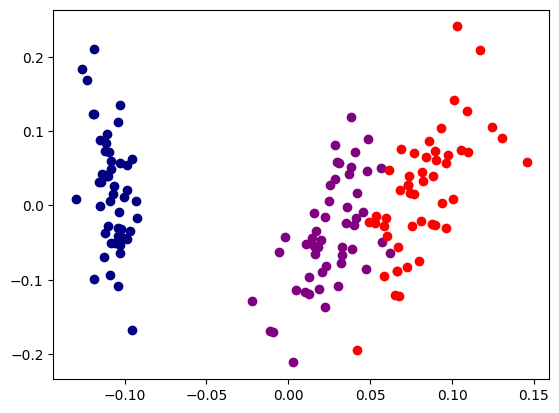

In [34]:
model = FastICA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


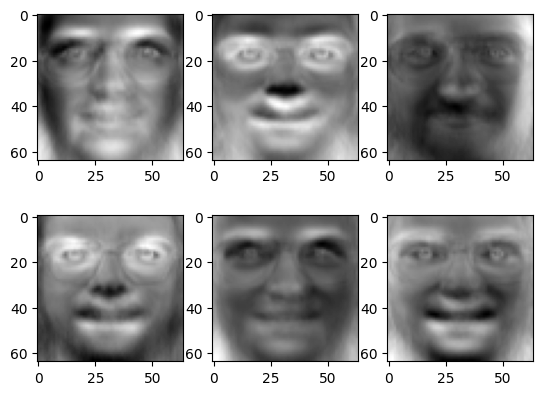

In [35]:
model = FastICA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Non-negative Matrix Factorization

* 음수 미포함 행렬 분해(Non-negative matrix factorization, NMF)는 `음수를 포함하지 않은 행렬 V를 음수를 포함하지 않은 행렬 W와 H의 곱으로 분해하는 알고리즘`

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


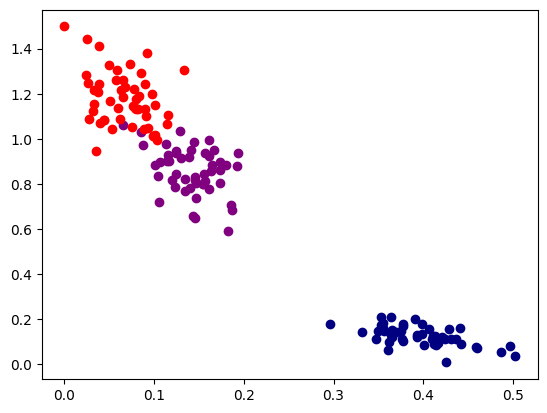

In [36]:
model = NMF(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


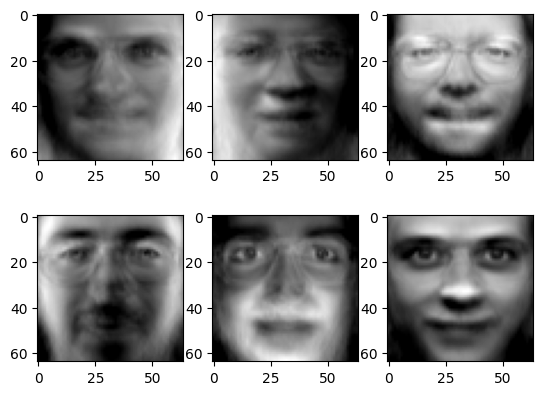

In [38]:
model = NMF(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Latent Dirichlet Allocation (LDA)

* 잠재 디리클레 할당은 이산 자료들에 대한 확률적 생성 모형
* 디리클레 분포에 따라 잠재적인 의미 구조를 파악


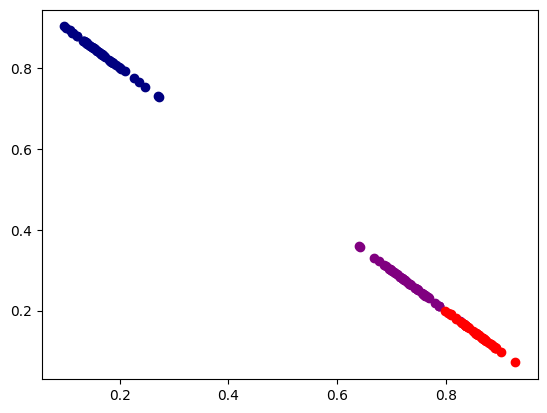

In [39]:
model = LatentDirichletAllocation(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

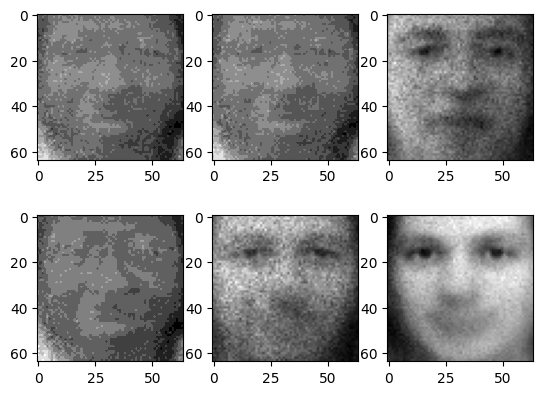

In [40]:
model = LatentDirichletAllocation(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Linear Discriminant Analysis (LDA)

* LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소
* LDA는 `지도학습 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원 축소`
* 개별 클래스를 분별할 수 있는 기준을 최대한 유지 --> 클래스 값을 줘야 한다 --> 지도학습에서만 사용 가능. --> 사진에 대해서는 사용 불가.

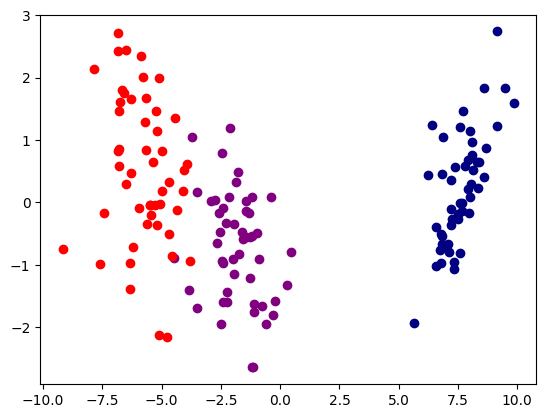

In [41]:
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(iris, labels)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

## 압축된 표현을 사용한 학습
* 행렬 분해를 통해 압축된 데이터를 사용해 학습

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

In [43]:
def min_max_scale(x) : 
    min_value, max_value = np.min(x, 0), np.max(x, 0)
    x = (x-min_value) / (max_value-min_value)
    return x

In [53]:
def plot_digits(digits, labels) :
    digits = min_max_scale(digits)
    ax = plt.subplot(111, projection='3d')
    for i in range(digits.shape[0]) :
        ax.text(digits[i, 0], digits[i, 1], digits[i, 2],
        str(labels[i]), color=plt.cm.Set1(labels[i] / 10.),
        fontdict={'weight' : 'bold', 'size':9})
    ax.view_init(4, -72)

In [46]:
digits = load_digits()

In [47]:
nmf = NMF(n_components=3)
nmf.fit(digits.data)
decomposed_digits = nmf.transform(digits.data)

In [51]:
print(digits.data.shape)
print(decomposed_digits.shape)

# 64차원을 NMF 분해하여 3차원으로 축소

(1797, 64)
(1797, 3)


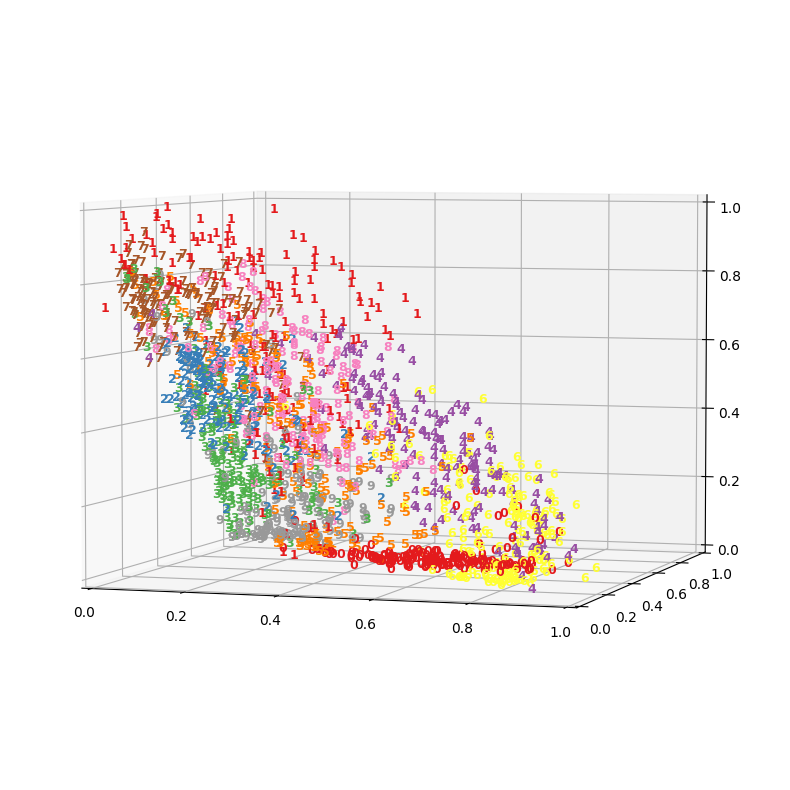

In [54]:
plt.figure(figsize=(20, 10))
plot_digits(decomposed_digits, digits.target)

### KNN

In [67]:
knn = KNeighborsClassifier()

In [68]:
score = cross_val_score(
    estimator=knn,
    X=digits.data, y=digits.target,
    cv=5
)
score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [69]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.9627282575054161 (+/- 0.011168537355954218)


In [70]:
score = cross_val_score(
    estimator=knn,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

# 차원 축소 데이터 입력..
# 성능이 떨어짐

array([0.60833333, 0.61666667, 0.65181058, 0.62674095, 0.63509749])

In [71]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.6277298050139276 (+/- 0.01505829189044171)


### SVM

In [62]:
svm = SVC()

In [63]:
score = cross_val_score(
    estimator=svm,
    X=digits.data, y=digits.target,
    cv=5
)
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [64]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.9632838130609718 (+/- 0.02008605863225686)


In [65]:
score = cross_val_score(
    estimator=svm,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

# 차원 축소 데이터 입력..
# 성능이 떨어짐

array([0.60555556, 0.675     , 0.66295265, 0.64066852, 0.6183844 ])

In [66]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.6405122253172392 (+/- 0.02609449324169577)


### Decision Tree

In [72]:
decision_tree = DecisionTreeClassifier()

In [73]:
score = cross_val_score(
    estimator=decision_tree,
    X=digits.data, y=digits.target,
    cv=5
)
score

array([0.78055556, 0.70277778, 0.79108635, 0.84401114, 0.80222841])

In [74]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.7841318477251625 (+/- 0.04602750311750008)


In [75]:
score = cross_val_score(
    estimator=decision_tree,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

# 차원 축소 데이터 입력..
# 성능이 떨어짐

array([0.54444444, 0.52222222, 0.57381616, 0.61281337, 0.57660167])

In [76]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.5659795728876509 (+/- 0.03080945666582755)


### Random Forest

In [77]:
random_forest = RandomForestClassifier()

In [78]:
score = cross_val_score(
    estimator=svm,
    X=digits.data, y=digits.target,
    cv=5
)
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [79]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.9632838130609718 (+/- 0.02008605863225686)


In [80]:
score = cross_val_score(
    estimator=random_forest,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

# 차원 축소 데이터 입력..
# 성능이 떨어짐

array([0.62222222, 0.65555556, 0.67688022, 0.64623955, 0.64345404])

In [81]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.6488703187867533 (+/- 0.017751761460538265)


## 복원된 표현을 사용한 학습

* 복원을 했더라도 성능적인 측면에서 많이 좋아지지 않는 것을 확인 -->


In [84]:
digits.data.shape

(1797, 64)

In [83]:
components = nmf.components_
reconstructed_digits = decomposed_digits @ components
reconstructed_digits.shape # 기존 data로 복원됨

(1797, 64)

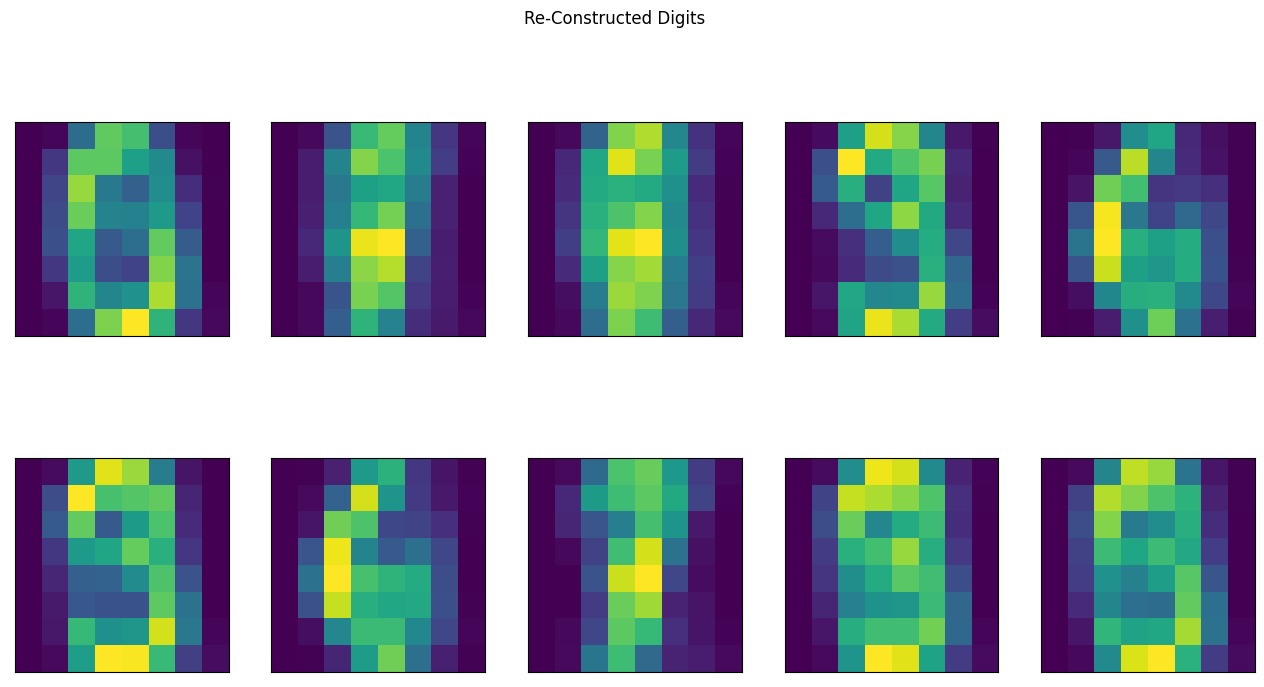

In [85]:
plt.figure(figsize=(16, 8))
plt.suptitle('Re-Constructed Digits')
for i in range(10) :
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reconstructed_digits[i].reshape(8, 8))

### KNN

In [88]:
score = cross_val_score(
    estimator=knn,
    X=reconstructed_digits, y=digits.target,
    cv=5
)
score

array([0.58611111, 0.64444444, 0.67130919, 0.63509749, 0.61002786])

In [89]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.6293980191891057 (+/- 0.029204057950992585)


### SVM

In [90]:
score = cross_val_score(
    estimator=svm,
    X=reconstructed_digits, y=digits.target,
    cv=5
)
score

array([0.60833333, 0.62777778, 0.64066852, 0.63231198, 0.60167131])

In [91]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.6221525843392138 (+/- 0.014752290768354546)


### Decision Tree

In [92]:
score = cross_val_score(
    estimator=decision_tree,
    X=reconstructed_digits, y=digits.target,
    cv=5
)
score

array([0.53611111, 0.55833333, 0.55431755, 0.57103064, 0.5821727 ])

In [93]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.5603930671618695 (+/- 0.01560947326925801)


### Random Forest

In [94]:
score = cross_val_score(
    estimator=random_forest,
    X=reconstructed_digits, y=digits.target,
    cv=5
)
score

array([0.6       , 0.67222222, 0.6545961 , 0.63788301, 0.64066852])

In [95]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.64107397090684 (+/- 0.02387668008020009)


## 이미지 복원

In [116]:
from sklearn.model_selection import train_test_split

train_faces, test_faces = train_test_split(faces, test_size=0.1)

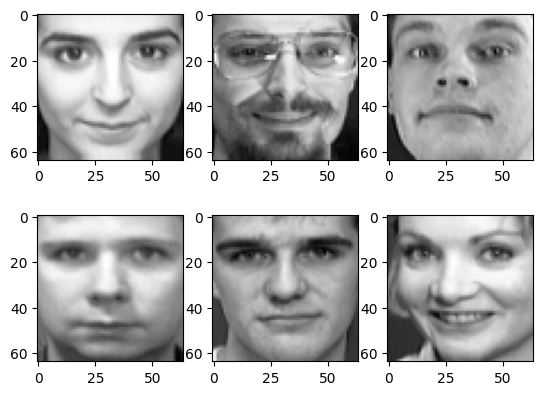

In [117]:
show_faces(train_faces)

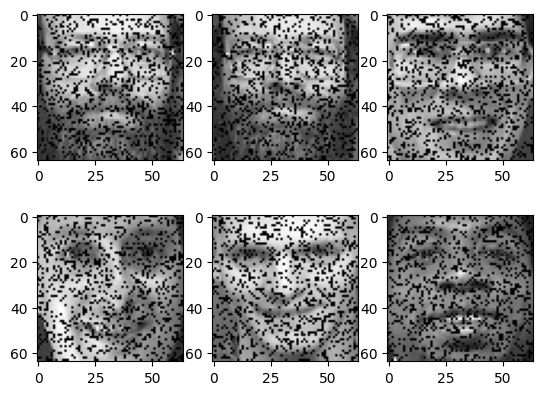

In [118]:
damaged_faces = []
for face in test_faces:
  idx = np.random.choice(range(64 * 64), size=1024)
  damaged_face = face.copy()
  damaged_face[idx] = 0.
  damaged_faces.append(damaged_face)
show_faces(damaged_faces)

# random으로 사진에 찍어서 damage를 입힘

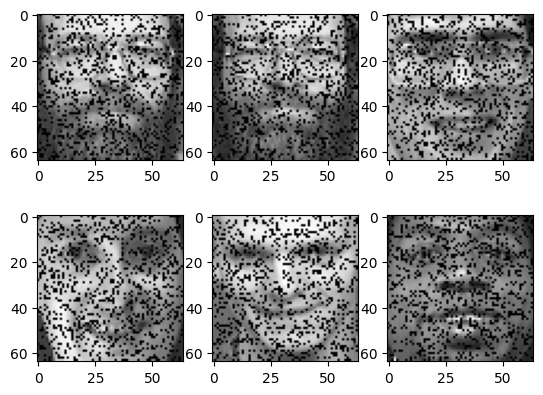

In [129]:
damaged_faces = []
for face in test_faces:
  idx = np.random.choice(range(64 * 64), size=1024)
  damaged_face = face.copy()
  damaged_face[idx] = 0.
  damaged_faces.append(damaged_face.astype(np.float64))  # cast to float64

show_faces(damaged_faces)


In [130]:
train_faces_float64 = train_faces.astype(np.float64)  # cast to float64

nmf = NMF(n_components=10)
nmf.fit(train_faces_float64)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=10)

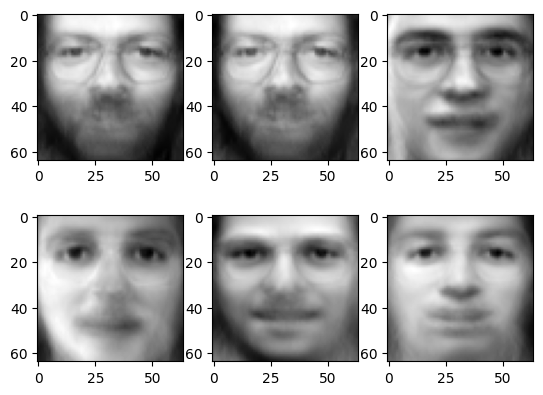

In [131]:
matrix1 = nmf.transform(np.array(damaged_faces))  # cast to float64
matrix2 = nmf.components_
show_faces((matrix1 @ matrix2).astype(train_faces.dtype))  # cast back to original dtype

# damage(noise)가 사라짐

In [132]:
nmf = NMF(n_components=100)
nmf.fit(train_faces_float64)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=100)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


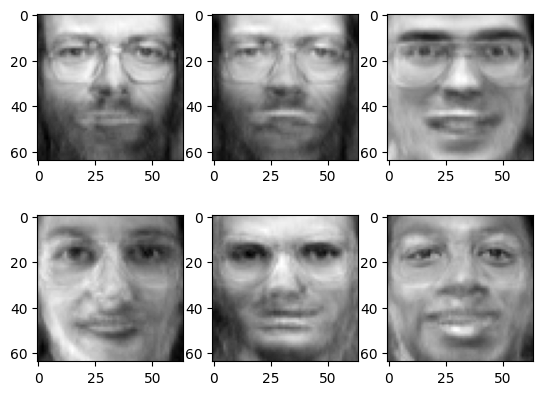

In [133]:
matrix1 = nmf.transform(np.array(damaged_faces))  # cast to float64
matrix2 = nmf.components_
show_faces((matrix1 @ matrix2).astype(train_faces.dtype))  # cast back to original dtype

# n_components=100
# damage(noise)가 사라짐, 좀 더 선명해짐